# import packages and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.ticker import MaxNLocator
import math
import cmath
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy.io import loadmat
import os
%matplotlib inline

In [2]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from time_shifted_PID import PIfunc
from time_shifted_PID import EqualState
from Spike_Generation import Spike_Time_Generater
from Spike_Generation import NL
from StimulusnResponse import expSnR
from SpatialTemporal_Correlation_and_Convolution import ST_STA

importing Jupyter notebook from time_shifted_PID.ipynb
importing Jupyter notebook from J_broja_PID.ipynb
importing Jupyter notebook from Spike_Generation.ipynb
importing Jupyter notebook from StimulusnResponse.ipynb
importing Jupyter notebook from SpatialTemporal_Correlation_and_Convolution.ipynb


In [3]:
def nc(x):
    x = x.astype(float)
    return (x-np.mean(x))/np.std(x)

In [4]:
Tot=300
dt=0.01
T=np.arange(dt,Tot,dt)
# OU ; input
tau= 1
D = 27*10**5
OU=np.zeros(len(T))
mu, sigma = 0, 1
for i in range(len(T)-1):
    OU[i+1]=OU[i]*(1-dt/tau)+math.sqrt(D*dt)*np.random.normal(mu,sigma)
# filtering for OUSmoothed
cutoffFreq = 5
b, a = signal.butter(2, 2*cutoffFreq*dt, btype='low', analog=False)
LPOU = signal.filtfilt(b, a, OU)

In [5]:
Lambda = 0.95
beta = (1-Lambda)/Lambda

x = nc(LPOU)
v = np.append(0,np.diff(x))/dt
tv = ndimage.gaussian_filter1d(x, sigma=5, order=1, mode='reflect') / dt
r = (1-Lambda)*x+Lambda*v

k = 23.
alpha = 20.
g = 40.
phi = 1.
y=np.zeros(len(T))
z=np.zeros(len(T))
for j in range(len(T)-1):
    dy=dt*(-alpha*y[j]+k*(x[j]-phi*z[j]))
    dz=dt*(-beta*z[j]+g*y[j])
    y[j+1]=y[j]+dy
    z[j+1]=z[j]+dz

(250, 251)

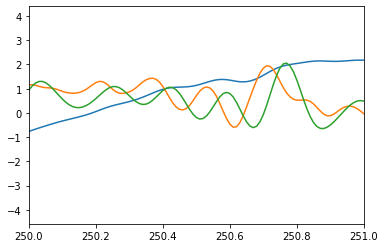

In [6]:
plt.plot(T,x)
plt.plot(T,nc(r))
plt.plot(T,nc(y))
# plt.plot(T,nc(v))
plt.xlim([250,251])

In [7]:
lambdas = np.arange(0.05,1.00,0.1)
betas = (1-lambdas)/lambdas

# Frequency Dependence

## NGD-Chou

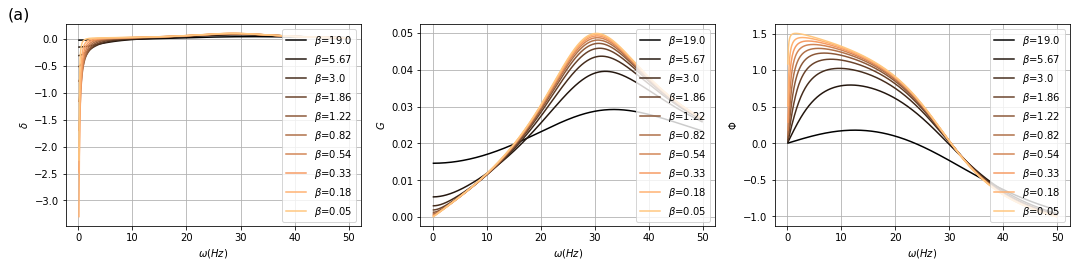

In [8]:
# k = 40.
# alpha = 45.7
# g = 30.
# phi = 1.
k = 1
g = 920
alpha = 20

dOmega = 0.1
fig, ax = plt.subplots(nrows =1, ncols =3)
for axi in ax:
    axi.set_prop_cycle(plt.cycler('color', plt.cm.copper(np.linspace(0, 1, len(betas)))))
    axi.set_xlabel(r'$\omega (Hz)$')
    axi.grid()
for beta in betas:
    omega = np.arange(dOmega,50,dOmega)
    H = k/(omega*1j+alpha+(k*phi*g/(omega*1j+beta)))#/(omega*1j)
    G = np.abs(H)
    Phi = np.angle(H)
    delta = -np.append(np.diff(Phi),0)/dOmega
    
    delta_phase = -(Phi-np.pi/2)/omega
    
    ax[0].plot(omega[:-1], delta[:-1])
    ax[0].set_ylabel(r'$\delta$')
    ax[1].plot(omega,G)
    ax[1].set_ylabel(r'$G$')
    ax[2].plot(omega,Phi)
    ax[2].set_ylabel(r'$\Phi$')
for axi in ax:
    axi.legend( [r'$\beta$='+str(round(beta,2)) for beta in betas], loc='best')
fig.text(0.08,0.9,'(a)', fontsize = 16)
fig.set_size_inches(18,3*(np.sqrt(5)-1))

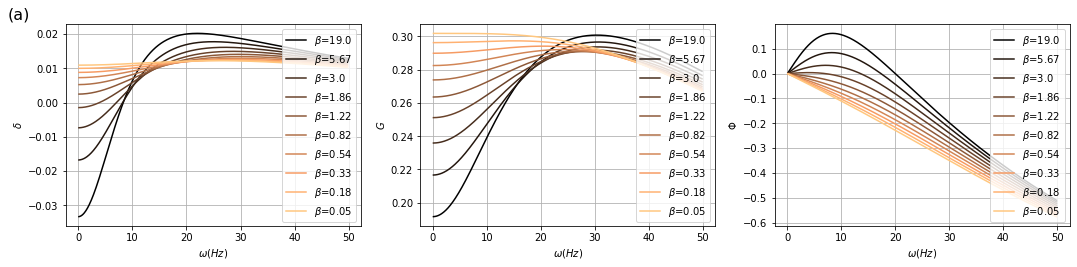

In [9]:
k = 23.
alpha = 60.
g = 10.
phi = 1.

dOmega = 0.1
fig, ax = plt.subplots(nrows =1, ncols =3)
for axi in ax:
    axi.set_prop_cycle(plt.cycler('color', plt.cm.copper(np.linspace(0, 1, len(betas)))))
    axi.set_xlabel(r'$\omega (Hz)$')
    axi.grid()
newbetas = np.arange(20,50,3)
for beta in newbetas:
    omega = np.arange(dOmega,50,dOmega)
    H = (k-(k*phi*g/(omega*1j+beta)))/(omega*1j+alpha)#/(omega*1j)
    G = np.abs(H)
    Phi = np.angle(H)
    delta = -np.append(np.diff(Phi),0)/dOmega
    
    delta_phase = -(Phi-np.pi/2)/omega
    
    ax[0].plot(omega[:-1], delta[:-1])
    ax[0].set_ylabel(r'$\delta$')
    ax[1].plot(omega,G)
    ax[1].set_ylabel(r'$G$')
    ax[2].plot(omega,Phi)
    ax[2].set_ylabel(r'$\Phi$')
for axi in ax:
    axi.legend( [r'$\beta$='+str(round(beta,2)) for beta in betas], loc='best')
fig.text(0.08,0.9,'(a)', fontsize = 16)
fig.set_size_inches(18,3*(np.sqrt(5)-1))

## NGD-2L(FBFF)

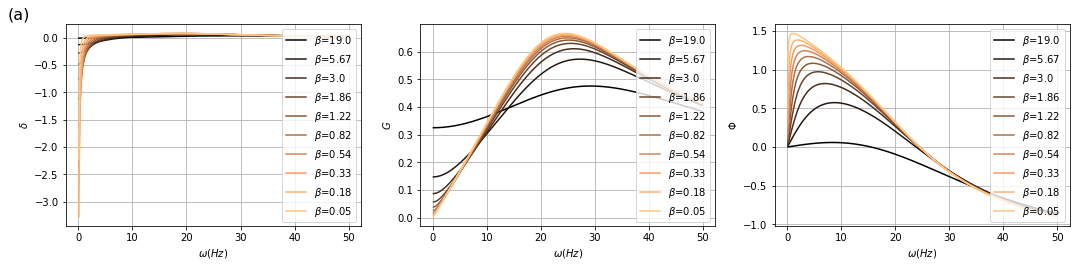

In [10]:
alpha = 30
k = 20.
g = 30
p = 100
psy =0.1
gamma = 100

dOmega = 0.1
fig, ax = plt.subplots(nrows =1, ncols =3)
for axi in ax:
    axi.set_prop_cycle(plt.cycler('color', plt.cm.copper(np.linspace(0, 1, len(betas)))))
    axi.set_xlabel(r'$\omega (Hz)$')
    axi.grid()
for beta in betas:
    omega = np.arange(dOmega,50,dOmega)
    H = k/(omega*1j+alpha+(k*phi*g/(omega*1j+beta)))#/(omega*1j)
    G = np.abs(H)
    Phi = np.angle(H)
    delta = -np.append(np.diff(Phi),0)/dOmega
    
    delta_phase = -(Phi-np.pi/2)/omega
    
    ax[0].plot(omega[:-1], delta[:-1])
    ax[0].set_ylabel(r'$\delta$')
    ax[1].plot(omega,G)
    ax[1].set_ylabel(r'$G$')
    ax[2].plot(omega,Phi)
    ax[2].set_ylabel(r'$\Phi$')
for axi in ax:
    axi.legend( [r'$\beta$='+str(round(beta,2)) for beta in betas], loc='best')
fig.text(0.08,0.9,'(a)', fontsize = 16)
fig.set_size_inches(18,3*(np.sqrt(5)-1))

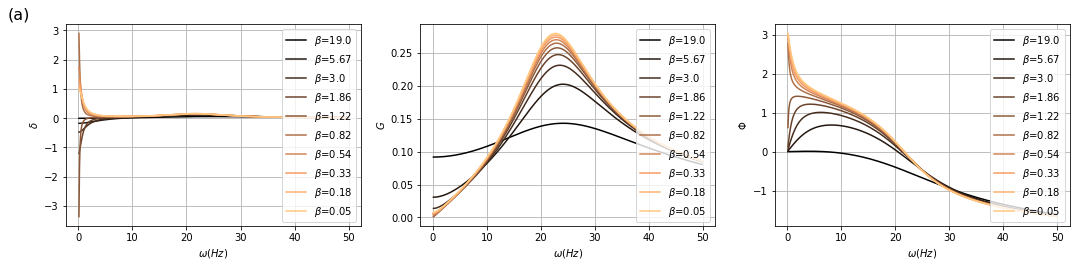

In [11]:
alpha = 14
k = 20.
g = 26
p = 21
psy =0.04
gamma = 100

dOmega = 0.1
fig, ax = plt.subplots(nrows =1, ncols =3)
for axi in ax:
    axi.set_prop_cycle(plt.cycler('color', plt.cm.copper(np.linspace(0, 1, len(betas)))))
    axi.set_xlabel(r'$\omega (Hz)$')
    axi.grid()
for beta in betas:
    omega = np.arange(dOmega,50,dOmega)
    H = k*p*((omega*1j+beta)*(1-psy)-psy*g)/(omega*1j+gamma)/((omega*1j+alpha)*(omega*1j+beta)+k*g)
    G = np.abs(H)
    Phi = np.angle(H)
    delta = -np.append(np.diff(Phi),0)/dOmega
    
    delta_phase = -(Phi-np.pi/2)/omega
    
    ax[0].plot(omega[:-1], delta[:-1])
    ax[0].set_ylabel(r'$\delta$')
    ax[1].plot(omega,G)
    ax[1].set_ylabel(r'$G$')
    ax[2].plot(omega,Phi)
    ax[2].set_ylabel(r'$\Phi$')
for axi in ax:
    axi.legend( [r'$\beta$='+str(round(beta,2)) for beta in betas], loc='best')
fig.text(0.08,0.9,'(a)', fontsize = 16)
fig.set_size_inches(18,3*(np.sqrt(5)-1))

## NGD-Voss

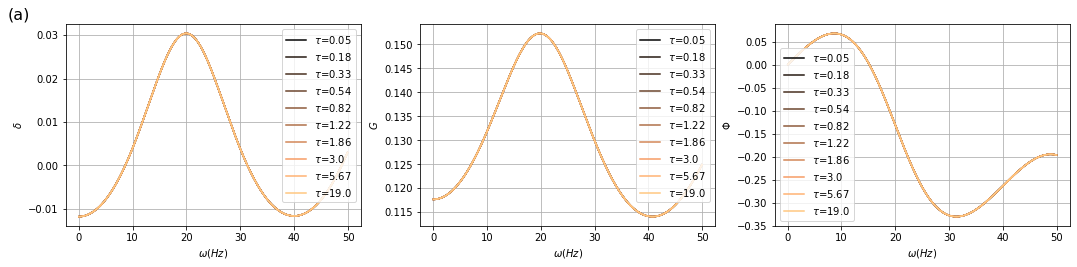

In [12]:
dOmega = 0.05
fig, ax = plt.subplots(nrows =1, ncols =3)
alpha = 150 #1/sec
K = 100


for axi in ax:
    axi.set_prop_cycle(plt.cycler('color', plt.cm.copper(np.linspace(0, 1, len(betas)))))
    axi.set_xlabel(r'$\omega (Hz)$')
    axi.grid()
for beta in betas:
    omega = np.arange(dOmega,50,dOmega)
    tau = 0.15
    H = k/(omega*1j+alpha+(k*np.exp(-1j*omega*tau)))#/(omega*1j)
    G = np.abs(H)
    Phi = np.angle(H)
    delta = -np.append(np.diff(Phi),0)/dOmega
    
    delta_phase = -(Phi-np.pi/2)/omega
    
    ax[0].plot(omega[:-1], delta[:-1])
    ax[0].set_ylabel(r'$\delta$')
    ax[1].plot(omega,G)
    ax[1].set_ylabel(r'$G$')
    ax[2].plot(omega,Phi)
    ax[2].set_ylabel(r'$\Phi$')
for axi in ax:
    axi.legend( [r'$\tau$='+str(round(1/beta,2)) for beta in betas], loc='best')
fig.text(0.08,0.9,'(a)', fontsize = 16)
fig.set_size_inches(18,3*(np.sqrt(5)-1))

## EZ

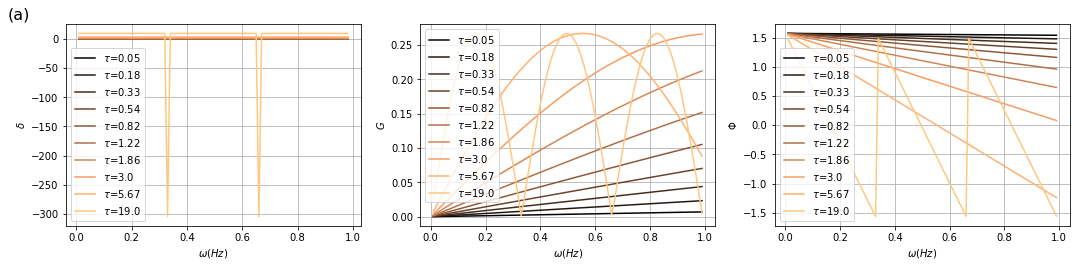

In [13]:
dOmega = 0.01
fig, ax = plt.subplots(nrows =1, ncols =3)
for axi in ax:
    axi.set_prop_cycle(plt.cycler('color', plt.cm.copper(np.linspace(0, 1, len(betas)))))
    axi.set_xlabel(r'$\omega (Hz)$')
    axi.grid()
for beta in betas:
    omega = np.arange(dOmega,1,dOmega)
    tau = 1/beta
    H = k*(1-np.exp(-1j*omega*tau))/(omega*1j+alpha)#/(omega*1j)
    G = np.abs(H)
    Phi = np.angle(H)
    delta = -np.append(np.diff(Phi),0)/dOmega
    
    delta_phase = -(Phi-np.pi/2)/omega
    
    ax[0].plot(omega[:-1], delta[:-1])
    ax[0].set_ylabel(r'$\delta$')
    ax[1].plot(omega,G)
    ax[1].set_ylabel(r'$G$')
    ax[2].plot(omega,Phi)
    ax[2].set_ylabel(r'$\Phi$')
for axi in ax:
    axi.legend( [r'$\tau$='+str(round(1/beta,2)) for beta in betas], loc='best')
fig.text(0.08,0.9,'(a)', fontsize = 16)
fig.set_size_inches(18,3*(np.sqrt(5)-1))

## LC-Leo

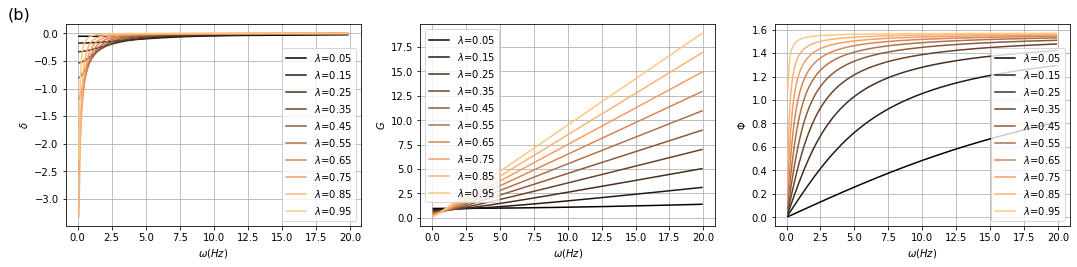

In [14]:
dOmega = 0.1
fig, ax = plt.subplots(nrows =1, ncols =3)
for axi in ax:
    axi.set_prop_cycle(plt.cycler('color', plt.cm.copper(np.linspace(0, 1, len(betas)))))
    axi.set_xlabel(r'$\omega (Hz)$')
    axi.legend( [str(round(Lambda,2)) for Lambda in lambdas], loc='best')
    axi.grid()
for Lambda in lambdas:
    omega = np.arange(dOmega,20,dOmega)
    H = (1-Lambda+Lambda*1j*omega)#/(omega*1j)
    G = np.abs(H)
    Phi = np.angle(H)
    delta = -np.append(np.diff(Phi),0)/dOmega
    delta_phase = -(Phi)/omega
    
    ax[0].plot(omega[:-1], delta[:-1])
    ax[0].set_ylabel(r'$\delta$')
    ax[1].plot(omega,G)
    ax[1].set_ylabel(r'$G$')
    ax[2].plot(omega,Phi)
    ax[2].set_ylabel(r'$\Phi$')
    
for axi in ax:
    axi.legend( [r'$\lambda$='+str(round(Lambda,2)) for Lambda in lambdas], loc='best')
fig.text(0.08,0.9,'(b)', fontsize = 16)
fig.set_size_inches(18,3*(np.sqrt(5)-1))

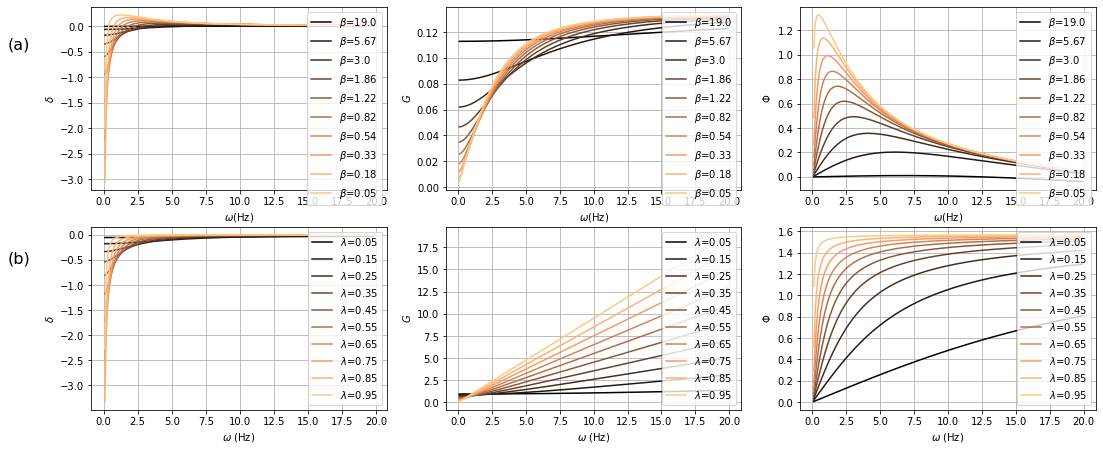

In [15]:
dOmega = 0.1
fig, (axup, axdown) = plt.subplots(nrows =2, ncols =3)
for axi in axup:
    axi.set_prop_cycle(plt.cycler('color', plt.cm.copper(np.linspace(0, 1, len(betas)))))
    axi.set_xlabel(r'$\omega$(Hz)')
    axi.grid()
for axi in axdown:
    axi.set_prop_cycle(plt.cycler('color', plt.cm.copper(np.linspace(0, 1, len(betas)))))
    axi.set_xlabel(r'$\omega$ (Hz)')
    axi.grid()
    
for beta in betas:
    omega = np.arange(dOmega,20,dOmega)
    H = k/(omega*1j+alpha+(k*phi*g/(omega*1j+beta)))#/(omega*1j)
    G = np.abs(H)
    Phi = np.angle(H)
    delta = -np.append(np.diff(Phi),0)/dOmega
    
    delta_phase = -(Phi-np.pi/2)/omega
    
    axup[0].plot(omega[:-1], delta[:-1])
    axup[0].set_ylabel(r'$\delta$')
    axup[1].plot(omega,G)
    axup[1].set_ylabel(r'$G$')
    axup[2].plot(omega,Phi)
    axup[2].set_ylabel(r'$\Phi$')
for axi in axup:
    axi.legend( [r'$\beta$='+str(round(beta,2)) for beta in betas], loc='best')
# fig.text(0.08,0.9,'(a)', fontsize = 16)

for Lambda in lambdas:
    omega = np.arange(dOmega,20,dOmega)
    H = (1-Lambda+Lambda*1j*omega)#/(omega*1j)
    G = np.abs(H)
    Phi = np.angle(H)
    delta = -np.append(np.diff(Phi),0)/dOmega
    delta_phase = -(Phi)/omega
    
    axdown[0].plot(omega[:-1], delta[:-1])
    axdown[0].set_ylabel(r'$\delta$')
    axdown[1].plot(omega,G)
    axdown[1].set_ylabel(r'$G$')
    axdown[2].plot(omega,Phi)
    axdown[2].set_ylabel(r'$\Phi$')
    
for axi in axdown:
    axi.legend( [r'$\lambda$='+str(round(Lambda,2)) for Lambda in lambdas], loc='best')
fig.text(0.06,0.8,'(a)', fontsize = 16)
fig.text(0.06,0.4,'(b)', fontsize = 16)
fig.set_size_inches(18,6*(np.sqrt(5)-1))
# fig.savefig('D:\\GoogleDrive\\retina\\PID_paper\\HeuristicVSNGD_FreqDomain_Props.jpeg')

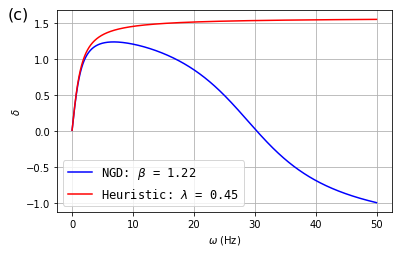

In [24]:
alpha = 20
g = 920
k = 1

fig, ax = plt.subplots()

dOmega = 0.01
Lambda = 0.45
beta = (1-Lambda)/Lambda
omega = np.arange(dOmega,50,dOmega)
# H = k/(omega*1j+alpha+(k*phi*g/(omega*1j+beta))) #/(omega*1j)
H = k*(1j*omega+beta) / ( (1j*omega+beta)*(1j*omega+alpha)+k*g )
G = np.abs(H)
Phi = np.angle(H)
ax.plot(omega[:-1], Phi[:-1], 'b')
NGD_delta = -np.append(np.diff(Phi),0)/dOmega


H = (1-Lambda+Lambda*1j*omega)#/(omega*1j)
G = np.abs(H)
Phi = np.angle(H)
xv_delta = -np.append(np.diff(Phi),0)/dOmega


# ax.plot(omega[:-1], NGD_delta[:-1])
# ax.plot(omega[:-1], xv_delta[:-1])
ax.plot(omega[:-1], Phi[:-1], 'r')
ax.set_ylabel(r'$\delta$')
ax.set_xlabel(r'$\omega$ (Hz)')
ax.legend( (r'NGD: $\beta$ = '+str(round(beta, 2)), 'Heuristic: $\lambda$ = '+str(round(Lambda, 2)))
          , loc='best',prop={'size': 'large', 'family': 'monospace'})
ax.grid()
fig.text(0.01,0.85,'(c)', fontsize = 16)
fig.set_size_inches(6,3*(np.sqrt(5)-1))
fig.savefig('D:\\GoogleDrive\\retina\\PID_paper\\HeuristicVSNGD_FreqDomain_Props_onefig.jpeg')

In [17]:
# import pandas as pd
# data = {}
# data['omega']=omega[:-1]
# data['NGD_delta']=NGD_delta[:-1]
# data['xv_delta']=xv_delta[:-1]

# data_df = pd.DataFrame(data)
# # data = np.arange(1,101).reshape((10,10))
# # data_df = pd.DataFrame(data)
 
# # # change the index and column name
# # data_df.columns = ['A','B','C','D','E','F','G','H','I','J']
# # data_df.index = ['a','b','c','d','e','f','g','h','i','j']
 
# # create and writer pd.DataFrame to excel
# name  = 'deltaVSomega'
# writer = pd.ExcelWriter('D:\\GoogleDrive\\retina\\PID_paper\\For Origin Plot\\'+name+'.xlsx')
# data_df.to_excel(writer,'page_1',float_format='%.5f') # float_format 控制精度
# writer.save()

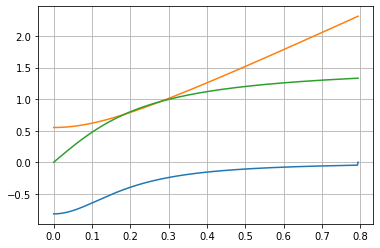

In [18]:
Lambda = 0.45
omega = np.arange(0,5,dOmega)
H = (1-Lambda+Lambda*1j*omega)
G = np.abs(H)
Phi = np.angle(H)
delta = -np.append(np.diff(Phi),0)/dOmega
plt.plot(omega/2/np.pi, delta)
plt.plot(omega/2/np.pi,G)
plt.plot(omega/2/np.pi,Phi)
plt.grid()

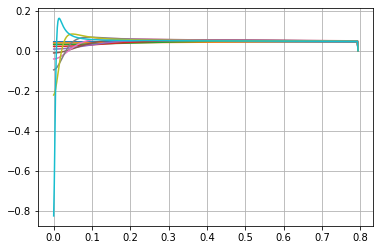

In [19]:
for beta in betas:
    g = beta
    omega = np.arange(0,5,dOmega)
    H = k/(omega*1j+alpha+(k*phi*g/(omega*1j+beta)))
    G = np.abs(H)
    Phi = np.angle(H)
    delta = -np.append(np.diff(Phi),0)/dOmega
    plt.plot(omega/2/np.pi, delta)
plt.grid()

In [20]:
omega

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [21]:
RL = (-k*g+omega)

In [22]:
betas

array([19.        ,  5.66666667,  3.        ,  1.85714286,  1.22222222,
        0.81818182,  0.53846154,  0.33333333,  0.17647059,  0.05263158])

In [23]:
lambdas

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])